## 4.1 The MAX Anomaly in Weekly Stock Returns

In [1]:
import pandas as pd
import numpy as np
import sys

# 添加config路径
sys.path.append(r'C:\Users\ZHOU\Documents\2025CUHK\兴银\需要拷的数据\packages')
import config

# 设置日期范围
start_date = "2009-01-05"  
end_date = "2025-04-15"

import pickle
with open('frdata/stock_return.pkl', 'rb') as f:
    stock_return = pickle.load(f)


In [2]:
stock_return

,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,000012,000014,000016,000017,000018,000019,000020,000021,000022,000023,...,873726,873806,873833,920002,920008,920016,920019,920029,920060,920066,920082,920088,920098,920099,920106,920108,920111,920116,920118,920128
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-01-05,2.6400,3.8800,3.6500,3.2300,5.0700,4.6300,2.2600,3.7700,1.9400,0.5100,3.0600,1.2200,3.1700,nan,-0.7500,4.9100,3.3300,4.5900,3.3700,4.2000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-01-06,6.0800,2.9900,2.9800,3.1300,4.0500,3.2400,3.1000,3.8700,2.0900,3.3200,1.6000,2.2800,3.0800,nan,2.0300,6.9300,2.4200,3.4600,2.6500,3.0200,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-01-07,-3.0100,-0.5800,5.0000,-1.1400,-0.7400,-3.1400,1.2900,-0.7000,2.0500,0.7400,-0.3400,0.0000,-1.4900,nan,0.0000,-1.9300,0.7900,0.2200,-1.3900,0.2400,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-01-08,-3.9000,0.5800,5.0100,-2.6800,-1.8700,3.5400,2.5400,-3.2900,1.2800,0.2500,0.1100,-5.5100,-2.7300,nan,-0.5000,0.7100,-3.9100,-2.4500,-3.5200,-2.4400,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-01-09,2.6000,-0.1400,3.8200,4.3300,0.9500,0.0000,1.8600,3.6400,0.7200,2.4500,2.1400,4.1700,2.4900,nan,1.0000,4.0800,1.6300,2.2800,1.5600,3.7500,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-09,-0.1848,3.8235,2.5404,nan,3.6778,2.4209,5.0909,1.3316,2.9167,4.1278,0.6303,2.4705,9.8958,0.9124,nan,-3.5230,2.0896,3.7618,nan,nan,...,11.5921,11.5689,8.4118,29.9939,23.4721,6.7132,7.2408,2.3855,7.5608,6.2464,11.8372,8.0993,14.8879,7.7547,8.2217,6.7058,8.3439,21.4906,8.4669,7.2613
2025-04-10,0.9259,1.9830,2.7027,nan,3.0405,5.8182,5.8824,1.5769,4.0486,2.0460,0.6263,9.9581,9.9526,2.8933,nan,1.6854,5.3606,0.9063,nan,nan,...,30.0000,1.9886,4.9919,10.8327,0.4304,3.5948,2.7621,-0.8002,4.1681,2.5772,2.8115,2.8151,3.9044,3.5983,0.1688,3.7156,3.0727,0.4801,3.7135,3.8832
2025-04-11,-0.0917,-1.6667,0.3289,nan,3.1148,1.7182,-2.9412,0.6468,0.0000,-1.1278,0.0000,0.0000,9.9138,1.9332,nan,-4.4199,1.1101,2.8144,nan,nan,...,1.3926,0.9749,-0.3618,1.9102,0.8333,-1.5379,0.4480,-3.6418,2.1702,-0.9683,-0.8043,0.5476,-0.5507,-0.5368,2.4944,0.5307,0.0377,7.2308,0.9865,0.2646


# 4.1

### Table1 PanelA

In [3]:
stock_return.index = pd.to_datetime(stock_return.index)
weekly_max_df =stock_return.resample('W').max()
weekly_max_df

,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,000012,000014,000016,000017,000018,000019,000020,000021,000022,000023,...,873726,873806,873833,920002,920008,920016,920019,920029,920060,920066,920082,920088,920098,920099,920106,920108,920111,920116,920118,920128
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-01-11,6.0800,3.8800,5.0100,4.3300,5.0700,4.6300,3.1000,3.8700,2.0900,3.3200,3.0600,4.1700,3.1700,nan,2.0300,6.9300,3.3300,4.5900,3.3700,4.2000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-01-18,7.7100,4.8700,1.2300,3.1300,3.8900,2.4500,5.0700,6.2100,3.6000,3.2600,5.6100,0.8000,2.1500,nan,4.9600,4.7000,4.4000,5.4800,2.7900,2.6100,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-01-25,4.6100,2.6000,1.4500,1.4800,1.1100,4.9400,4.4800,7.8200,1.4100,5.1200,8.0800,10.0400,1.4800,nan,0.7100,0.8500,2.5700,1.4700,2.2700,1.4100,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-02-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-02-08,9.1200,7.7100,4.6500,5.2600,6.4100,4.9900,5.0600,7.8900,5.0700,3.1600,4.6200,10.0700,7.4400,nan,3.7300,5.2800,5.0300,6.6800,4.2300,4.9000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-23,0.2611,0.2653,1.3866,nan,4.3210,1.0989,1.0753,0.4646,4.7782,0.9434,0.8048,0.9778,0.7547,2.6275,nan,0.7622,1.0895,1.9403,nan,nan,...,1.0929,2.6651,0.2167,0.7351,1.5005,6.8243,3.2864,nan,4.9426,1.2903,24.2883,2.8757,1.6216,5.1515,8.1888,11.6484,1.0879,4.8522,1.8746,6.3480
2025-03-30,0.4394,0.1393,1.0732,nan,10.0592,4.9505,1.1278,1.3111,0.6601,1.2005,1.8072,2.6244,1.6807,2.1595,nan,1.5480,1.7256,1.2455,nan,nan,...,1.8098,1.9317,1.6775,-0.5876,2.9998,11.8374,9.1215,150.3621,2.0891,6.5957,0.1195,5.5743,5.0918,8.7032,1.6169,1.9906,4.8780,2.4058,6.1184,6.8616
2025-04-06,0.8873,1.4205,3.6961,nan,-0.8230,0.9772,10.1961,0.8631,0.3559,2.1635,0.8114,3.3676,0.0000,5.6856,nan,2.1807,1.4925,0.2148,nan,nan,...,0.9153,0.2730,5.8228,4.6667,2.2166,7.0090,1.6682,9.0961,2.2515,4.3500,3.2727,1.6936,1.3729,1.5951,7.4093,5.9649,2.6942,3.9083,2.2017,3.4689


In [4]:
stock_return_copy = stock_return.copy()
stock_return_copy = stock_return_copy/100
price_index = (1 + stock_return_copy).cumprod()

# 按周取开始和结束价格
weekly_start = price_index.resample('W').first()
weekly_end = price_index.resample('W').last()

# 计算周收益率
weekly_returns_df = (weekly_end / weekly_start) - 1
weekly_returns_df

,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,000012,000014,000016,000017,000018,000019,000020,000021,000022,000023,...,873726,873806,873833,920002,920008,920016,920019,920029,920060,920066,920082,920088,920098,920099,920106,920108,920111,920116,920118,920128
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-01-11,0.0145,0.0284,0.1788,0.0352,0.0231,0.0354,0.0907,0.0338,0.0628,0.0690,0.0354,0.0067,0.0123,nan,0.0254,0.0992,0.0081,0.0345,-0.0082,0.0453,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-01-18,0.0771,0.0162,-0.0376,0.0305,0.0358,0.0058,-0.0232,0.1990,0.0379,-0.0071,0.0126,-0.0080,0.0273,nan,0.0471,0.0519,0.0307,0.0549,0.0245,0.0336,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-01-25,0.0478,0.0029,0.0269,-0.0001,0.0073,-0.0028,0.0680,0.0875,0.0212,0.0840,0.1796,0.0757,-0.0029,nan,-0.0399,-0.0232,0.0567,0.0084,0.0088,0.0189,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-02-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-02-08,0.1313,0.1155,0.0442,0.0453,0.1266,0.1956,0.0517,0.1074,0.0884,0.0915,0.0199,0.1320,0.1111,nan,0.0908,0.1003,0.0682,0.1225,0.0737,0.0680,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-23,-0.0070,-0.0265,-0.0628,nan,0.0227,-0.0173,-0.0212,-0.0174,0.0098,-0.0012,0.0080,0.0106,-0.0599,-0.0448,nan,-0.0091,-0.0262,-0.0464,nan,nan,...,-0.1092,-0.1332,-0.2369,-0.1024,-0.0639,-0.1762,-0.0989,nan,-0.1461,-0.1272,0.1495,-0.0416,-0.1332,-0.0350,-0.0795,-0.0540,-0.1195,-0.0580,-0.1026,-0.1474
2025-03-30,-0.0026,-0.0084,-0.0476,nan,0.1975,0.0333,-0.0264,-0.0083,-0.0489,0.0121,0.0040,0.0253,-0.0206,-0.0164,nan,0.0093,-0.0008,-0.0241,nan,nan,...,-0.0639,-0.0148,-0.1291,-0.1262,-0.1296,-0.0159,-0.0986,0.0000,-0.0668,-0.0496,-0.2449,-0.1223,-0.0728,-0.1074,-0.1260,-0.1284,-0.0706,-0.1937,-0.0428,-0.0793
2025-04-06,0.0071,0.0128,0.0082,nan,-0.0439,0.0181,0.0977,0.0086,-0.0140,0.0252,0.0203,0.0215,-0.0130,0.0268,nan,0.0358,0.0075,-0.0070,nan,nan,...,0.0138,-0.0047,0.0647,-0.0605,0.0166,0.0925,-0.0070,0.1478,-0.0426,0.0324,-0.0104,-0.0129,-0.0268,-0.0104,0.0585,0.0702,-0.0341,0.0053,0.0401,-0.0021


In [5]:
with open(r'C:\Users\ZHOU\Documents\2025CUHK\兴银\需要拷的数据\packages\frdata\stock_totalmv.pkl', 'rb') as f:
    stock_totalmv = pickle.load(f)

# 构建周度市值数据
stock_totalmv.index = pd.to_datetime(stock_totalmv.index)
weekly_mv_df = stock_totalmv.resample('W').last()  # 用每周最后一天的市值
weekly_mv_df

,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,000012,000014,000016,000017,000018,000019,000020,000021,000022,000023,...,873726,873806,873833,920002,920008,920016,920019,920029,920060,920066,920082,920088,920098,920099,920106,920108,920111,920116,920118,920128
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-01-11,3058852.2556,7575699.8402,36529.8575,242298.4059,268807.1289,64922.8424,36311.0315,443571.8820,82182.7534,226472.0552,1122052.5335,151278.8903,396107.0196,nan,68502.6542,106788.8527,70790.3068,394024.2974,627999.8730,57583.8396,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-01-18,3297970.6552,7608685.4709,34430.4404,247784.4075,278950.7941,63628.0849,37268.5232,550569.3148,84682.0500,225930.2560,1182670.5865,150875.4799,408146.7467,nan,71547.2166,114247.6993,76170.3701,422168.8901,647342.7849,59803.9394,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-01-25,3614724.8990,7740627.9935,35354.1840,251441.7419,277936.4276,66587.5307,39330.8131,606665.0564,84682.0500,244893.2271,1373184.4676,151884.0058,411758.6648,nan,69179.2236,106788.8527,79001.9823,423927.9271,658948.5321,60081.4519,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-02-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-02-08,4096067.1321,8598254.3905,37705.5311,274300.0821,311410.5229,81384.7597,43455.3927,685614.6185,94091.1667,264939.7966,1401637.8395,174676.6919,481589.0816,nan,77128.9143,123707.6998,88629.4641,491650.8532,715042.9766,65354.1890,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-23,22161558.5821,8781002.1707,154223.0285,nan,912596.6511,216876.4755,752436.6182,2182015.0144,356392.2105,507774.1864,1550699.5140,276416.7878,1208788.5948,425916.2886,nan,754910.5914,358198.9522,3049388.1470,nan,nan,...,242948.6482,461931.5205,182015.6000,682544.5200,278396.2500,200537.9250,500224.4793,nan,545840.3402,184564.3029,375597.3200,253645.9200,278278.3027,272047.9931,340673.4825,329640.0000,482375.3405,1181193.7500,151415.6000,286438.3200
2025-03-30,22025717.1547,8494665.1434,132380.2820,nan,1047596.1557,214797.7873,700825.4422,2145906.0189,335698.4693,500026.4582,1535346.0535,274238.3718,1143774.0688,413510.9598,nan,751452.9856,343757.7296,2976040.5303,nan,nan,...,216519.7749,460127.1005,153930.8400,585038.1600,249581.2500,190068.3827,492024.0780,1018189.8692,519992.7475,180478.8367,275593.0800,228809.7570,254695.3957,263972.7933,297486.1500,274659.0000,443431.5610,975312.2500,148107.3600,265816.0600
2025-04-06,22006311.2365,8518526.5623,129997.4369,nan,940946.5471,214797.7873,763302.1289,2109797.0234,324201.9463,508370.1655,1544558.1298,264314.4766,1095615.1606,423159.5489,nan,766435.9439,344040.8908,2887087.0378,nan,nan,...,216519.7749,442383.6372,172132.4000,575287.5240,254362.5000,200845.8528,474151.4085,1271599.4698,509045.5317,183262.3411,276901.2750,229690.4720,251279.9402,252918.3935,325240.8900,300120.0000,439863.0075,1018793.8750,149074.3840,270931.0300


In [6]:
print("开始构建Panel A数据")

# 存储结果（等权重和市值加权）
portfolio_returns_ew = {'Low': [], '2': [], '3': [], '4': [], 'High': [], 'High_minus_Low': []}
portfolio_returns_vw = {'Low': [], '2': [], '3': [], '4': [], 'High': [], 'High_minus_Low': []}

# 为每一周计算分组投资组合
for i in range(len(weekly_max_df) - 1):
    # 当前周的MAX值 (t-1周)
    current_max = weekly_max_df.iloc[i]
    
    # 下一周的收益率 (t周)
    next_returns = weekly_returns_df.iloc[i + 1]
    
    # 当前周的市值（用作权重）
    current_mv = weekly_mv_df.iloc[i]
    
    # 去除缺失值（三个数据都要有）
    valid_stocks = current_max.dropna().index.intersection(
        next_returns.dropna().index).intersection(current_mv.dropna().index)
    
    if len(valid_stocks) >= 50:
        # 根据MAX值排序
        max_values = current_max[valid_stocks]
        returns_values = next_returns[valid_stocks]
        mv_values = current_mv[valid_stocks]
        
        # 分为5个五分位组合
        n_stocks = len(valid_stocks)
        quintile_size = n_stocks // 5
        
        sorted_indices = max_values.sort_values().index
        
        # 分组
        groups = {
            'Low': sorted_indices[:quintile_size],
            '2': sorted_indices[quintile_size:2*quintile_size],
            '3': sorted_indices[2*quintile_size:3*quintile_size],
            '4': sorted_indices[3*quintile_size:4*quintile_size],
            'High': sorted_indices[4*quintile_size:]
        }
        
        # 计算每组的等权重和市值加权收益率
        for group_name, group_stocks in groups.items():
            # 等权重
            ew_return = returns_values[group_stocks].mean()
            portfolio_returns_ew[group_name].append(ew_return)
            
            # 市值加权
            group_returns = returns_values[group_stocks]
            group_weights = mv_values[group_stocks]
            vw_return = (group_returns * group_weights).sum() / group_weights.sum()
            portfolio_returns_vw[group_name].append(vw_return)
        
        # 多空组合收益率
        ew_long_short = portfolio_returns_ew['High'][-1] - portfolio_returns_ew['Low'][-1]
        vw_long_short = portfolio_returns_vw['High'][-1] - portfolio_returns_vw['Low'][-1]
        
        portfolio_returns_ew['High_minus_Low'].append(ew_long_short)
        portfolio_returns_vw['High_minus_Low'].append(vw_long_short)

print("分组完成！")

开始构建Panel A数据
分组完成！


In [7]:
i = 0
# 当前周的MAX值 (t-1周)
current_max = weekly_max_df.iloc[i]
# 下一周的收益率 (t周)
next_returns = weekly_returns_df.iloc[i + 1]
print(f"current_max: {current_max}")
# 当前周的市值（用作权重）
current_mv = weekly_mv_df.iloc[i]
# 去除缺失值（三个数据都要有）
valid_stocks = current_max.dropna().index.intersection(
    next_returns.dropna().index).intersection(current_mv.dropna().index)
print(f"valid_stocks: {valid_stocks}")
if len(valid_stocks) >= 50:
    # 根据MAX值排序
    max_values = current_max[valid_stocks]
    returns_values = next_returns[valid_stocks]
    mv_values = current_mv[valid_stocks]
    print(f"max_values: {max_values}")
    print(f"returns_values: {returns_values}")
    print(f"mv_values: {mv_values}")
    # 分为5个五分位组合
    n_stocks = len(valid_stocks)
    quintile_size = n_stocks // 5
    print(f"quintile_size: {quintile_size}")
    sorted_indices = max_values.sort_values().index
    print(f"sorted_indices: {sorted_indices}")
    # 分组
    groups = {
        'Low': sorted_indices[:quintile_size],
        '2': sorted_indices[quintile_size:2*quintile_size],
        '3': sorted_indices[2*quintile_size:3*quintile_size],
        '4': sorted_indices[3*quintile_size:4*quintile_size],
        'High': sorted_indices[4*quintile_size:]
    }
    
    # 计算每组的等权重和市值加权收益率
    for group_name, group_stocks in groups.items():
        # 等权重
        ew_return = returns_values[group_stocks].mean()
        print(f"ew_return: {ew_return}")
        portfolio_returns_ew[group_name].append(ew_return)
        
        # 市值加权
        group_returns = returns_values[group_stocks]
        print(f"group_returns: {group_returns}")
        group_weights = mv_values[group_stocks]
        print(f"group_weights: {group_weights}")
        vw_return = (group_returns * group_weights).sum() / group_weights.sum()
        portfolio_returns_vw[group_name].append(vw_return)
    
    # 多空组合收益率
    ew_long_short = portfolio_returns_ew['High'][-1] - portfolio_returns_ew['Low'][-1]
    vw_long_short = portfolio_returns_vw['High'][-1] - portfolio_returns_vw['Low'][-1]
    
    portfolio_returns_ew['High_minus_Low'].append(ew_long_short)
    portfolio_returns_vw['High_minus_Low'].append(vw_long_short)
    print(f"portfolio_returns_ew: {portfolio_returns_ew}")

current_max: 000001   6.0800
000002   3.8800
000004   5.0100
000005   4.3300
000006   5.0700
          ...  
920108      nan
920111      nan
920116      nan
920118      nan
920128      nan
Name: 2009-01-11 00:00:00, Length: 5642, dtype: float64
valid_stocks: Index(['000001', '000002', '000004', '000005', '000006', '000007', '000008',
       '000009', '000010', '000011',
       ...
       '601872', '601898', '601899', '601919', '601939', '601958', '601988',
       '601991', '601998', '601999'],
      dtype='object', length=1551)
max_values: 000001   6.0800
000002   3.8800
000004   5.0100
000005   4.3300
000006   5.0700
          ...  
601958   6.8100
601988   1.6600
601991   8.0100
601998   2.5900
601999   6.6000
Name: 2009-01-11 00:00:00, Length: 1551, dtype: float64
returns_values: 000001    0.0771
000002    0.0162
000004   -0.0376
000005    0.0305
000006    0.0358
           ...  
601958    0.0564
601988    0.0101
601991   -0.0519
601998    0.0309
601999   -0.0071
Name: 2009-01-18 00

In [8]:
import numpy as np

def calculate_results(portfolio_returns, title):
    results = {}
    print(f"\n{title}")
    print("Group\t\tMean Return\tt-stat")
    print("-" * 40)
    
    for group in ['Low', '2', '3', '4', 'High', 'High_minus_Low']:
        returns_series = pd.Series(portfolio_returns[group])
        mean_return = returns_series.mean() * 100  # 转为百分比
        std_return = returns_series.std()
        t_stat = mean_return / (std_return / np.sqrt(len(returns_series)) * 100)
        
        results[group] = {'mean_return': mean_return, 't_stat': t_stat}
        print(f"{group}\t\t{mean_return:.2f}\t\t({t_stat:.2f})")
    
    return results

# 输出结果
ew_results = calculate_results(portfolio_returns_ew, "Panel A.1: Equal-weighted")
vw_results = calculate_results(portfolio_returns_vw, "Panel A.2: Value-weighted")


Panel A.1: Equal-weighted
Group		Mean Return	t-stat
----------------------------------------
Low		0.15		(1.45)
2		0.22		(2.00)
3		0.18		(1.57)
4		0.07		(0.56)
High		-0.14		(-1.16)
High_minus_Low		-0.30		(-4.83)

Panel A.2: Value-weighted
Group		Mean Return	t-stat
----------------------------------------
Low		0.12		(1.36)
2		0.14		(1.52)
3		0.04		(0.45)
4		-0.06		(-0.53)
High		-0.25		(-2.16)
High_minus_Low		-0.37		(-4.56)


### Table1 PanelB

In [9]:
# Panel B数据构建 - 跳过一周
print("开始构建Panel B数据...")

# 存储结果
portfolio_returns_ew_b = {'Low': [], '2': [], '3': [], '4': [], 'High': [], 'High_minus_Low': []}
portfolio_returns_vw_b = {'Low': [], '2': [], '3': [], '4': [], 'High': [], 'High_minus_Low': []}


for i in range(len(weekly_max_df) - 2): 
    current_max = weekly_max_df.iloc[i]
    
    next_returns = weekly_returns_df.iloc[i + 2]
    
    #print(f"用第{i}周MAX预测第{i+2}周收益")  # 调试信息
    
    # 当前周的市值（用作权重）
    current_mv = weekly_mv_df.iloc[i]
    
    # 去除缺失值
    valid_stocks = current_max.dropna().index.intersection(
        next_returns.dropna().index).intersection(current_mv.dropna().index)
    
    if len(valid_stocks) >= 50:
        # 根据MAX值排序
        max_values = current_max[valid_stocks]
        returns_values = next_returns[valid_stocks]
        mv_values = current_mv[valid_stocks]
        
        # 分为5个五分位组合
        n_stocks = len(valid_stocks)
        quintile_size = n_stocks // 5
        
        sorted_indices = max_values.sort_values().index
        
        # 分组
        groups = {
            'Low': sorted_indices[:quintile_size],
            '2': sorted_indices[quintile_size:2*quintile_size],
            '3': sorted_indices[2*quintile_size:3*quintile_size],
            '4': sorted_indices[3*quintile_size:4*quintile_size],
            'High': sorted_indices[4*quintile_size:]
        }
        
        # 计算每组的等权重和市值加权收益率
        for group_name, group_stocks in groups.items():
            # 等权重
            ew_return = returns_values[group_stocks].mean()
            portfolio_returns_ew_b[group_name].append(ew_return)
            
            # 市值加权
            group_returns = returns_values[group_stocks]
            group_weights = mv_values[group_stocks]
            vw_return = (group_returns * group_weights).sum() / group_weights.sum()
            portfolio_returns_vw_b[group_name].append(vw_return)
        
        # 多空组合收益率
        ew_long_short = portfolio_returns_ew_b['High'][-1] - portfolio_returns_ew_b['Low'][-1]
        vw_long_short = portfolio_returns_vw_b['High'][-1] - portfolio_returns_vw_b['Low'][-1]
        
        portfolio_returns_ew_b['High_minus_Low'].append(ew_long_short)
        portfolio_returns_vw_b['High_minus_Low'].append(vw_long_short)

print("Panel B分组完成！")

开始构建Panel B数据...
Panel B分组完成！


In [10]:
# 计算Panel B结果
def calculate_results(portfolio_returns, title):
    results = {}
    print(f"\n{title}")
    print("Group\t\tMean Return\tt-stat")
    print("-" * 40)
    
    for group in ['Low', '2', '3', '4', 'High', 'High_minus_Low']:
        if len(portfolio_returns[group]) > 0:
            returns_series = pd.Series(portfolio_returns[group])
            mean_return = returns_series.mean() * 100  # 转为百分比
            std_return = returns_series.std()
            t_stat = mean_return / (std_return / np.sqrt(len(returns_series)) * 100)
            
            results[group] = {'mean_return': mean_return, 't_stat': t_stat}
            print(f"{group}\t\t{mean_return:.2f}\t\t({t_stat:.2f})")
        else:
            print(f"{group}\t\t无数据")
    
    return results

# 输出Panel B结果
ew_results_b = calculate_results(portfolio_returns_ew_b, "Panel B.1: Equal-weighted (skip 1 week)")
vw_results_b = calculate_results(portfolio_returns_vw_b, "Panel B.2: Value-weighted (skip 1 week)")


Panel B.1: Equal-weighted (skip 1 week)
Group		Mean Return	t-stat
----------------------------------------
Low		0.09		(0.84)
2		0.18		(1.67)
3		0.22		(1.88)
4		0.16		(1.35)
High		0.03		(0.20)
High_minus_Low		-0.06		(-1.22)

Panel B.2: Value-weighted (skip 1 week)
Group		Mean Return	t-stat
----------------------------------------
Low		0.06		(0.63)
2		0.10		(1.05)
3		0.09		(0.93)
4		0.06		(0.59)
High		-0.07		(-0.63)
High_minus_Low		-0.13		(-1.71)


# 4.2 Portfolios Double-Sorted on MAX and Past 1-week Returns


## 4.2.1 Baseline results

In [11]:
# 双重排序 - 5x5组合
print("开始构建双重排序数据...")

# 存储25个组合的结果 - 5(MAX) x 5(PRET)
double_sort_returns_ew = {}
double_sort_returns_vw = {}

# 初始化存储结构
max_groups = ['Low', '2', '3', '4', 'High']
pret_groups = ['Losers', '2', '3', '4', 'Winners']

for max_group in max_groups:
    double_sort_returns_ew[max_group] = {}
    double_sort_returns_vw[max_group] = {}
    for pret_group in pret_groups:
        double_sort_returns_ew[max_group][pret_group] = []
        double_sort_returns_vw[max_group][pret_group] = []

# 双重排序循环
for i in range(len(weekly_max_df) - 2):
    
    # t-2周的MAX值（用于第一次排序）
    max_values_t2 = weekly_max_df.iloc[i]
    
    # t-1周的收益率PRET（用于第二次排序）
    pret_values_t1 = weekly_returns_df.iloc[i + 1]
    
    # t周的收益率（用于计算组合表现）
    returns_t = weekly_returns_df.iloc[i + 2]
    
    # t-2周的市值（用作权重）
    mv_values_t2 = weekly_mv_df.iloc[i]
    
    # 找到所有数据都有效的股票
    valid_stocks = (max_values_t2.dropna().index
                   .intersection(pret_values_t1.dropna().index)
                   .intersection(returns_t.dropna().index)
                   .intersection(mv_values_t2.dropna().index))
    
    if len(valid_stocks) >= 100:  # 需要足够多的股票进行5x5分组
        
        # 第一步：按MAX分成5组
        max_data = max_values_t2[valid_stocks]
        max_quintiles = pd.qcut(max_data.rank(method='first'), 
                               q=5, labels=['Low', '2', '3', '4', 'High'])
        
        # 第二步：在每个MAX组内按PRET分成5组
        for max_group in max_groups:
            
            # 获取当前MAX组的股票
            max_group_stocks = max_data[max_quintiles == max_group].index
            
            if len(max_group_stocks) >= 10:  # 确保每个MAX组有足够股票
                
                # 在当前MAX组内按PRET排序
                pret_data = pret_values_t1[max_group_stocks]
                
                if len(pret_data.dropna()) >= 5:
                    try:
                        pret_quintiles = pd.qcut(pret_data.dropna().rank(method='first'),
                                               q=5, labels=['Losers', '2', '3', '4', 'Winners'])
                        
                        # 第三步：计算每个双重分组的收益率
                        for pret_group in pret_groups:
                            
                            # 获取当前双重分组的股票
                            final_stocks = pret_data[pret_quintiles == pret_group].index
                            
                            if len(final_stocks) > 0:
                                # 计算等权重收益率
                                group_returns = returns_t[final_stocks]
                                ew_return = group_returns.mean()
                                double_sort_returns_ew[max_group][pret_group].append(ew_return)
                                
                                # 计算市值加权收益率
                                group_mv = mv_values_t2[final_stocks]
                                vw_return = (group_returns * group_mv).sum() / group_mv.sum()
                                double_sort_returns_vw[max_group][pret_group].append(vw_return)
                            
                    except Exception as e:
                        # 如果分组失败，跳过这一期
                        continue

print("双重排序完成！")

开始构建双重排序数据...
双重排序完成！


In [12]:
# 计算双重排序结果表格
def create_double_sort_table(returns_data, title):
    print(f"\n{title}")
    print("MAX\\PRET\tLosers\t2\t3\t4\tWinners\tExcess")
    print("-" * 60)
    
    results = {}
    
    for max_group in ['High', '4', '3', '2', 'Low']:  # 从High到Low显示
        row_results = {}
        row_data = []
        
        for pret_group in ['Losers', '2', '3', '4', 'Winners']:
            if len(returns_data[max_group][pret_group]) > 0:
                returns_series = pd.Series(returns_data[max_group][pret_group])
                mean_return = returns_series.mean() * 100  # 转为百分比
                std_return = returns_series.std()
                t_stat = mean_return / (std_return / np.sqrt(len(returns_series)) * 100)
                
                row_results[pret_group] = {'mean': mean_return, 't_stat': t_stat}
                row_data.append(f"{mean_return:.2f}")
            else:
                row_results[pret_group] = {'mean': 0, 't_stat': 0}
                row_data.append("0.00")
        
        # 计算Excess (Winners - Losers)
        if 'Winners' in row_results and 'Losers' in row_results:
            excess_return = row_results['Losers']['mean'] - row_results['Winners']['mean']
            # 这里简化t统计量计算
            excess_t = 0  # 实际需要用两个序列计算
            row_data.append(f"{excess_return:.2f}")
        else:
            row_data.append("0.00")
        
        results[max_group] = row_results
        print(f"{max_group}\t\t" + "\t".join(row_data))
    
    return results

# 生成表格
ew_table = create_double_sort_table(double_sort_returns_ew, "Panel A: Equal-weighted")
vw_table = create_double_sort_table(double_sort_returns_vw, "Panel B: Value-weighted")


Panel A: Equal-weighted
MAX\PRET	Losers	2	3	4	Winners	Excess
------------------------------------------------------------
High		0.05	0.12	0.06	-0.19	-0.29	0.34
4		0.31	0.31	0.25	0.06	-0.42	0.73
3		0.34	0.34	0.28	0.14	-0.32	0.66
2		0.32	0.30	0.22	0.09	-0.29	0.61
Low		0.18	0.18	0.13	-0.02	-0.29	0.47

Panel B: Value-weighted
MAX\PRET	Losers	2	3	4	Winners	Excess
------------------------------------------------------------
High		0.03	0.04	0.04	-0.20	-0.51	0.54
4		0.27	0.20	0.16	-0.05	-0.42	0.69
3		0.25	0.20	0.20	0.02	-0.30	0.55
2		0.24	0.22	0.16	0.00	-0.27	0.52
Low		0.18	0.06	0.08	0.01	-0.23	0.41


## 4.2.2 Subperiod Analysis

In [13]:
mid_date = '2017-01-01' 
# 转换为datetime用于比较
weekly_max_df.index = pd.to_datetime(weekly_max_df.index)
weekly_returns_df.index = pd.to_datetime(weekly_returns_df.index)
weekly_mv_df.index = pd.to_datetime(weekly_mv_df.index)

mid_datetime = pd.to_datetime(mid_date)

# 分割数据
# 第一期间
weekly_max_df_p1 = weekly_max_df[weekly_max_df.index < mid_datetime]
weekly_returns_df_p1 = weekly_returns_df[weekly_returns_df.index < mid_datetime]
weekly_mv_df_p1 = weekly_mv_df[weekly_mv_df.index < mid_datetime]

# 第二期间
weekly_max_df_p2 = weekly_max_df[weekly_max_df.index >= mid_datetime]
weekly_returns_df_p2 = weekly_returns_df[weekly_returns_df.index >= mid_datetime]
weekly_mv_df_p2 = weekly_mv_df[weekly_mv_df.index >= mid_datetime]

In [14]:
# 各自双重排序
def run_double_sort(max_df, returns_df, mv_df, period_name):
    print(f"\n开始 {period_name} 双重排序...")
    
    # 存储结果
    double_sort_ew = {}
    double_sort_vw = {}
    
    max_groups = ['Low', '2', '3', '4', 'High']
    pret_groups = ['Losers', '2', '3', '4', 'Winners']
    
    for max_group in max_groups:
        double_sort_ew[max_group] = {}
        double_sort_vw[max_group] = {}
        for pret_group in pret_groups:
            double_sort_ew[max_group][pret_group] = []
            double_sort_vw[max_group][pret_group] = []
    
    # 双重排序循环
    for i in range(len(max_df) - 2):
        max_values_t2 = max_df.iloc[i]
        pret_values_t1 = returns_df.iloc[i + 1]
        returns_t = returns_df.iloc[i + 2]
        mv_values_t2 = mv_df.iloc[i]
        
        valid_stocks = (max_values_t2.dropna().index
                       .intersection(pret_values_t1.dropna().index)
                       .intersection(returns_t.dropna().index)
                       .intersection(mv_values_t2.dropna().index))
        
        if len(valid_stocks) >= 100:
            max_data = max_values_t2[valid_stocks]
            max_quintiles = pd.qcut(max_data.rank(method='first'), 
                                   q=5, labels=['Low', '2', '3', '4', 'High'])
            
            for max_group in max_groups:
                max_group_stocks = max_data[max_quintiles == max_group].index
                
                if len(max_group_stocks) >= 10:
                    pret_data = pret_values_t1[max_group_stocks]
                    
                    if len(pret_data.dropna()) >= 5:
                        try:
                            pret_quintiles = pd.qcut(pret_data.dropna().rank(method='first'),
                                                   q=5, labels=['Losers', '2', '3', '4', 'Winners'])
                            
                            for pret_group in pret_groups:
                                final_stocks = pret_data[pret_quintiles == pret_group].index
                                
                                if len(final_stocks) > 0:
                                    group_returns = returns_t[final_stocks]
                                    ew_return = group_returns.mean()
                                    double_sort_ew[max_group][pret_group].append(ew_return)
                                    
                                    group_mv = mv_values_t2[final_stocks]
                                    vw_return = (group_returns * group_mv).sum() / group_mv.sum()
                                    double_sort_vw[max_group][pret_group].append(vw_return)
                        except:
                            continue
    
    return double_sort_ew, double_sort_vw

# 运行两个期间的双重排序
period1_ew, period1_vw = run_double_sort(weekly_max_df_p1, weekly_returns_df_p1, weekly_mv_df_p1, "第一期间")
period2_ew, period2_vw = run_double_sort(weekly_max_df_p2, weekly_returns_df_p2, weekly_mv_df_p2, "第二期间")


开始 第一期间 双重排序...

开始 第二期间 双重排序...


In [15]:
# 计算Excess收益率并生成Panel C表格
def calculate_subperiod_excess(period_ew, period_vw, period_name):
    print(f"\n{period_name} - Losers minus Winners")
    print("MAX\tEW Excess\tt-stat\tVW Excess\tt-stat")
    print("-" * 50)
    
    results = {}
    
    for max_group in ['High', '4', '3', '2', 'Low']:
        # 等权重Excess
        losers_ew = period_ew[max_group]['Losers']
        winners_ew = period_ew[max_group]['Winners']
        
        if len(losers_ew) > 0 and len(winners_ew) > 0:
            min_length = min(len(losers_ew), len(winners_ew))
            excess_ew = pd.Series(losers_ew[:min_length]) - pd.Series(winners_ew[:min_length])
            
            mean_ew = excess_ew.mean() * 100
            std_ew = excess_ew.std()
            t_ew = mean_ew / (std_ew / np.sqrt(len(excess_ew)) * 100) if std_ew > 0 else 0
        else:
            mean_ew, t_ew = 0, 0
        
        # 市值加权Excess
        losers_vw = period_vw[max_group]['Losers']
        winners_vw = period_vw[max_group]['Winners']
        
        if len(losers_vw) > 0 and len(winners_vw) > 0:
            min_length = min(len(losers_vw), len(winners_vw))
            excess_vw = pd.Series(losers_vw[:min_length]) - pd.Series(winners_vw[:min_length])
            
            mean_vw = excess_vw.mean() * 100
            std_vw = excess_vw.std()
            t_vw = mean_vw / (std_vw / np.sqrt(len(excess_vw)) * 100) if std_vw > 0 else 0
        else:
            mean_vw, t_vw = 0, 0
        
        results[max_group] = {
            'ew_excess': mean_ew, 'ew_t': t_ew,
            'vw_excess': mean_vw, 'vw_t': t_vw
        }
        
        print(f"{max_group}\t{mean_ew:.2f}\t({t_ew:.2f})\t{mean_vw:.2f}\t({t_vw:.2f})")
    
    return results

# 计算两个期间的结果
results_p1 = calculate_subperiod_excess(period1_ew, period1_vw, "2009-2017")
results_p2 = calculate_subperiod_excess(period2_ew, period2_vw, "2017-2025")


2009-2017 - Losers minus Winners
MAX	EW Excess	t-stat	VW Excess	t-stat
--------------------------------------------------
High	0.17	(1.16)	0.51	(3.46)
4	0.92	(8.80)	0.81	(6.18)
3	0.90	(9.16)	0.71	(5.69)
2	0.85	(9.49)	0.74	(5.91)
Low	0.73	(8.16)	0.56	(4.32)

2017-2025 - Losers minus Winners
MAX	EW Excess	t-stat	VW Excess	t-stat
--------------------------------------------------
High	0.51	(3.91)	0.57	(4.44)
4	0.55	(6.12)	0.57	(4.95)
3	0.43	(5.23)	0.38	(3.55)
2	0.37	(5.10)	0.30	(2.90)
Low	0.22	(3.17)	0.27	(2.72)


In [16]:
# Panel C格式的表格
print("\n" + "="*80)
print("Panel C: Subperiod Analysis")
print("="*80)

print("\n" + " "*20 + "2009-2017" + " "*20 + "2017-2025")
print("Panel C.1: Double sorts on MAX and Past-Returns - equal weighted")
print(" "*10 + "Losers minus Winners" + " "*10 + "Losers minus Winners")
print("MAX\tExcess\t\t\t\tExcess")
print("-" * 60)

for max_group in ['High', '4', '3', '2', 'Low']:
    p1_excess = results_p1[max_group]['ew_excess']
    p1_t = results_p1[max_group]['ew_t']
    p2_excess = results_p2[max_group]['ew_excess']
    p2_t = results_p2[max_group]['ew_t']
    
    print(f"{max_group}\t{p1_excess:.2f}\t\t\t\t{p2_excess:.2f}")
    print(f"\t({p1_t:.2f})\t\t\t\t({p2_t:.2f})")

print("\nPanel C.2: Double sorts on MAX and Past-Returns - value weighted")
print(" "*10 + "Losers minus Winners" + " "*10 + "Losers minus Winners")
print("MAX\tExcess\t\t\t\tExcess")
print("-" * 60)

for max_group in ['High', '4', '3', '2', 'Low']:
    p1_excess = results_p1[max_group]['vw_excess']
    p1_t = results_p1[max_group]['vw_t']
    p2_excess = results_p2[max_group]['vw_excess']
    p2_t = results_p2[max_group]['vw_t']
    
    print(f"{max_group}\t{p1_excess:.2f}\t\t\t\t{p2_excess:.2f}")
    print(f"\t({p1_t:.2f})\t\t\t\t({p2_t:.2f})")


Panel C: Subperiod Analysis

                    2009-2017                    2017-2025
Panel C.1: Double sorts on MAX and Past-Returns - equal weighted
          Losers minus Winners          Losers minus Winners
MAX	Excess				Excess
------------------------------------------------------------
High	0.17				0.51
	(1.16)				(3.91)
4	0.92				0.55
	(8.80)				(6.12)
3	0.90				0.43
	(9.16)				(5.23)
2	0.85				0.37
	(9.49)				(5.10)
Low	0.73				0.22
	(8.16)				(3.17)

Panel C.2: Double sorts on MAX and Past-Returns - value weighted
          Losers minus Winners          Losers minus Winners
MAX	Excess				Excess
------------------------------------------------------------
High	0.51				0.57
	(3.46)				(4.44)
4	0.81				0.57
	(6.18)				(4.95)
3	0.71				0.38
	(5.69)				(3.55)
2	0.74				0.30
	(5.91)				(2.90)
Low	0.56				0.27
	(4.32)				(2.72)


## 4.3  Results Based on Alternative Measures of MAX

In [17]:
print("构建不同时间窗口的MAX因子...")
# 构建滚动窗口MAX因子
# MAX_4w: 过去4周的最大值
weekly_max_4w = weekly_max_df.rolling(window=4, min_periods=1).max()

# MAX_13w: 过去13周的最大值  
weekly_max_13w = weekly_max_df.rolling(window=13, min_periods=1).max()

# MAX_26w: 过去26周的最大值
weekly_max_26w = weekly_max_df.rolling(window=26, min_periods=1).max()


构建不同时间窗口的MAX因子...


In [18]:
# 使用不同时间窗口的MAX因子运行双重排序
max_variants = {
    'MAX_4w': weekly_max_4w,
    'MAX_13w': weekly_max_13w, 
    'MAX_26w': weekly_max_26w
}

all_results = {}

for max_name, max_data in max_variants.items():
    print(f"\n运行 {max_name} 双重排序...")
    
    ew_results, vw_results = run_double_sort(max_data, weekly_returns_df, weekly_mv_df, max_name)
    all_results[max_name] = {'ew': ew_results, 'vw': vw_results}

print("所有变体的双重排序完成")


运行 MAX_4w 双重排序...

开始 MAX_4w 双重排序...

运行 MAX_13w 双重排序...

开始 MAX_13w 双重排序...

运行 MAX_26w 双重排序...

开始 MAX_26w 双重排序...
所有变体的双重排序完成


In [19]:
# 计算每个MAX变体的Excess收益率
def calculate_max_variant_excess(results_dict, max_name):
    print(f"\n=== {max_name} Results ===")
    print("MAX\tEW Excess\tt-stat\tVW Excess\tt-stat")
    print("-" * 50)
    
    results = {}
    ew_data = results_dict['ew']
    vw_data = results_dict['vw']
    
    for max_group in ['High', '4', '3', '2', 'Low']:
        # 等权重Excess (Losers - Winners)
        losers_ew = ew_data[max_group]['Losers']
        winners_ew = ew_data[max_group]['Winners']
        
        if len(losers_ew) > 0 and len(winners_ew) > 0:
            min_length = min(len(losers_ew), len(winners_ew))
            excess_ew = pd.Series(losers_ew[:min_length]) - pd.Series(winners_ew[:min_length])
            
            mean_ew = excess_ew.mean() * 100
            std_ew = excess_ew.std()
            t_ew = mean_ew / (std_ew / np.sqrt(len(excess_ew)) * 100) if std_ew > 0 else 0
        else:
            mean_ew, t_ew = 0, 0
        
        # 市值加权Excess (Losers - Winners)
        losers_vw = vw_data[max_group]['Losers'] 
        winners_vw = vw_data[max_group]['Winners']
        
        if len(losers_vw) > 0 and len(winners_vw) > 0:
            min_length = min(len(losers_vw), len(winners_vw))
            excess_vw = pd.Series(losers_vw[:min_length]) - pd.Series(winners_vw[:min_length])
            
            mean_vw = excess_vw.mean() * 100
            std_vw = excess_vw.std()
            t_vw = mean_vw / (std_vw / np.sqrt(len(excess_vw)) * 100) if std_vw > 0 else 0
        else:
            mean_vw, t_vw = 0, 0
        
        results[max_group] = {
            'ew_excess': mean_ew, 'ew_t': t_ew,
            'vw_excess': mean_vw, 'vw_t': t_vw
        }
        
        print(f"{max_group}\t{mean_ew:.2f}\t({t_ew:.2f})\t{mean_vw:.2f}\t({t_vw:.2f})")
    
    return results

# 计算所有变体的结果
variant_results = {}
for max_name in ['MAX_26w', 'MAX_13w', 'MAX_4w']:
    variant_results[max_name] = calculate_max_variant_excess(all_results[max_name], max_name)


=== MAX_26w Results ===
MAX	EW Excess	t-stat	VW Excess	t-stat
--------------------------------------------------
High	0.42	(4.25)	0.59	(6.30)
4	0.70	(10.51)	0.55	(6.89)
3	0.65	(10.67)	0.63	(7.91)
2	0.60	(9.91)	0.49	(5.75)
Low	0.43	(7.53)	0.42	(4.99)

=== MAX_13w Results ===
MAX	EW Excess	t-stat	VW Excess	t-stat
--------------------------------------------------
High	0.43	(4.30)	0.63	(6.50)
4	0.75	(11.54)	0.65	(7.99)
3	0.64	(9.94)	0.57	(6.60)
2	0.53	(8.82)	0.43	(5.46)
Low	0.47	(8.33)	0.38	(4.60)

=== MAX_4w Results ===
MAX	EW Excess	t-stat	VW Excess	t-stat
--------------------------------------------------
High	0.39	(4.09)	0.63	(6.65)
4	0.68	(10.22)	0.58	(6.64)
3	0.60	(9.61)	0.54	(6.91)
2	0.62	(10.33)	0.52	(6.56)
Low	0.54	(9.55)	0.45	(5.55)


In [20]:
# Table 3格式的表格
print("\n" + "="*100)
print("Table 3: Alternative MAX Specifications")
print("="*100)

print("\n" + " "*30 + "Equal-weighted" + " "*15 + "Value-weighted")
print(" "*25 + "Losers minus Winners" + " "*8 + "Losers minus Winners")
print("MAX\tExcess\t\t\t\tExcess")
print("-" * 80)

# Panel A: MAX_26w
print("\nPanel A: 26-Week MAX (MAX_26w)")
for max_group in ['High', '4', '3', '2', 'Low']:
    ew_excess = variant_results['MAX_26w'][max_group]['ew_excess']
    ew_t = variant_results['MAX_26w'][max_group]['ew_t']
    vw_excess = variant_results['MAX_26w'][max_group]['vw_excess'] 
    vw_t = variant_results['MAX_26w'][max_group]['vw_t']
    
    print(f"{max_group}\t{ew_excess:.2f}\t\t\t\t{vw_excess:.2f}")
    print(f"\t({ew_t:.2f})\t\t\t\t({vw_t:.2f})")

# Panel B: MAX_13w  
print("\nPanel B: 13-Week MAX (MAX_13w)")
for max_group in ['High', '4', '3', '2', 'Low']:
    ew_excess = variant_results['MAX_13w'][max_group]['ew_excess']
    ew_t = variant_results['MAX_13w'][max_group]['ew_t']
    vw_excess = variant_results['MAX_13w'][max_group]['vw_excess']
    vw_t = variant_results['MAX_13w'][max_group]['vw_t']
    
    print(f"{max_group}\t{ew_excess:.2f}\t\t\t\t{vw_excess:.2f}")
    print(f"\t({ew_t:.2f})\t\t\t\t({vw_t:.2f})")

# Panel C: MAX_4w
print("\nPanel C: 4-Week MAX (MAX_4w)")  
for max_group in ['High', '4', '3', '2', 'Low']:
    ew_excess = variant_results['MAX_4w'][max_group]['ew_excess']
    ew_t = variant_results['MAX_4w'][max_group]['ew_t'] 
    vw_excess = variant_results['MAX_4w'][max_group]['vw_excess']
    vw_t = variant_results['MAX_4w'][max_group]['vw_t']
    
    print(f"{max_group}\t{ew_excess:.2f}\t\t\t\t{vw_excess:.2f}")
    print(f"\t({ew_t:.2f})\t\t\t\t({vw_t:.2f})")


Table 3: Alternative MAX Specifications

                              Equal-weighted               Value-weighted
                         Losers minus Winners        Losers minus Winners
MAX	Excess				Excess
--------------------------------------------------------------------------------

Panel A: 26-Week MAX (MAX_26w)
High	0.42				0.59
	(4.25)				(6.30)
4	0.70				0.55
	(10.51)				(6.89)
3	0.65				0.63
	(10.67)				(7.91)
2	0.60				0.49
	(9.91)				(5.75)
Low	0.43				0.42
	(7.53)				(4.99)

Panel B: 13-Week MAX (MAX_13w)
High	0.43				0.63
	(4.30)				(6.50)
4	0.75				0.65
	(11.54)				(7.99)
3	0.64				0.57
	(9.94)				(6.60)
2	0.53				0.43
	(8.82)				(5.46)
Low	0.47				0.38
	(8.33)				(4.60)

Panel C: 4-Week MAX (MAX_4w)
High	0.39				0.63
	(4.09)				(6.65)
4	0.68				0.58
	(10.22)				(6.64)
3	0.60				0.54
	(9.61)				(6.91)
2	0.62				0.52
	(10.33)				(6.56)
Low	0.54				0.45
	(9.55)				(5.55)


## 4.4 Results Based on the Alternative Measure of Investors’ Lottery Preference (LLI)

## 5.1 Evidence from Amihud Illiquidity Measure


In [21]:
# 1. 计算Amihud Illiquidity
with open(r'C:\Users\ZHOU\Documents\2025CUHK\兴银\需要拷的数据\packages\frdata\stock_amount.pkl', 'rb') as f:
    stock_amount = pickle.load(f)
abs_return = stock_return.abs() / 100.0
amihud_daily = abs_return / stock_amount
amihud_daily = amihud_daily.replace([np.inf, -np.inf], np.nan)
amihud_weekly = amihud_daily.resample('W').mean()
amihud_4w = amihud_weekly.rolling(window=4, min_periods=2).mean()
amihud_4w*1e6

,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,000012,000014,000016,000017,000018,000019,000020,000021,000022,000023,...,873726,873806,873833,920002,920008,920016,920019,920029,920060,920066,920082,920088,920098,920099,920106,920108,920111,920116,920118,920128
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-01-11,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-01-18,0.0554,0.0299,8.7334,0.8407,0.6607,5.8355,7.3555,0.3356,4.6917,5.1000,0.2294,0.6518,0.5903,nan,7.9355,1.3815,8.2773,1.3931,0.8376,2.6131,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-01-25,0.0474,0.0276,6.7360,0.6747,0.5195,4.7153,7.4781,0.2677,3.9050,4.2140,0.2317,0.9353,0.5030,nan,7.7130,1.3622,6.9111,1.0509,0.6811,2.3094,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-02-01,0.0474,0.0276,6.7360,0.6747,0.5195,4.7153,7.4781,0.2677,3.9050,4.2140,0.2317,0.9353,0.5030,nan,7.7130,1.3622,6.9111,1.0509,0.6811,2.3094,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-02-08,0.0429,0.0231,4.3050,0.4918,0.3567,3.7542,7.2268,0.1361,2.6013,3.7000,0.2253,0.8255,0.3219,nan,8.7912,1.0397,4.9151,0.7486,0.4399,1.5801,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-23,0.0047,0.0118,0.1982,nan,0.0781,0.4152,0.0670,0.0474,0.2096,0.2517,0.0705,0.1797,0.0392,0.1818,nan,0.2332,0.4431,0.0162,nan,nan,...,0.4977,0.1638,0.4032,0.1442,0.2491,0.4583,0.2036,nan,0.1060,0.4092,0.2418,0.3406,0.2590,0.3689,0.3603,0.2556,0.1548,0.0977,0.7464,0.3358
2025-03-30,0.0040,0.0130,0.2338,nan,0.0780,0.4327,0.0851,0.0506,0.2057,0.2553,0.0744,0.1871,0.0506,0.1757,nan,0.1993,0.4808,0.0198,nan,nan,...,0.4247,0.1835,0.3916,0.1175,0.2325,0.4637,0.1776,nan,0.1084,0.4903,0.2414,0.3424,0.2812,0.3293,0.3094,0.2967,0.1897,0.1092,0.7561,0.3631
2025-04-06,0.0043,0.0144,0.3022,nan,0.0715,0.4437,0.1035,0.0601,0.2014,0.2510,0.1035,0.2175,0.0575,0.1470,nan,0.2097,0.4494,0.0214,nan,nan,...,0.3295,0.1983,0.3113,0.1263,0.2120,0.5106,0.2093,0.4032,0.1313,0.6095,0.2548,0.3509,0.3021,0.3351,0.3707,0.3692,0.2292,0.1043,0.7550,0.3830


In [22]:
# 根据流动性，MAX，PRET三重排序
def run_triple_sort(illiq_df, max_df, returns_df, mv_df, period_name=""):
    """
    三重排序：流动性(3) × MAX(5) × PRET(5) = 75个组合
    """
    print(f"开始三重排序 {period_name}...")
    
    # 存储结果 - 3×5×5结构
    triple_sort_ew = {}
    triple_sort_vw = {}
    
    illiq_groups = ['Low', 'Middle', 'High']  # 流动性分3组
    max_groups = ['Low', '2', '3', '4', 'High']  # MAX分5组
    pret_groups = ['Losers', '2', '3', '4', 'Winners']  # PRET分5组
    
    # 初始化存储结构
    for illiq_group in illiq_groups:
        triple_sort_ew[illiq_group] = {}
        triple_sort_vw[illiq_group] = {}
        for max_group in max_groups:
            triple_sort_ew[illiq_group][max_group] = {}
            triple_sort_vw[illiq_group][max_group] = {}
            for pret_group in pret_groups:
                triple_sort_ew[illiq_group][max_group][pret_group] = []
                triple_sort_vw[illiq_group][max_group][pret_group] = []
    
    # 三重排序循环
    for i in range(len(illiq_df) - 2):
        
        # t-1周的流动性指标（第一次排序）
        illiq_values_t1 = illiq_df.iloc[i + 1]
        
        # t-2周的MAX值（第二次排序）
        max_values_t2 = max_df.iloc[i]
        
        # t-1周的收益率PRET（第三次排序）
        pret_values_t1 = returns_df.iloc[i + 1]
        
        # t周的收益率（用于计算组合表现）
        returns_t = returns_df.iloc[i + 2]
        
        # t-2周的市值（用作权重）
        mv_values_t2 = mv_df.iloc[i]
        
        # 找到所有数据都有效的股票
        valid_stocks = (illiq_values_t1.dropna().index
                       .intersection(max_values_t2.dropna().index)
                       .intersection(pret_values_t1.dropna().index)
                       .intersection(returns_t.dropna().index)
                       .intersection(mv_values_t2.dropna().index))
        
        if len(valid_stocks) >= 150:  # 需要足够股票进行3×5×5分组
            
            # 第一步：按流动性分成3组
            illiq_data = illiq_values_t1[valid_stocks]
            illiq_tertiles = pd.qcut(illiq_data.rank(method='first'), 
                                   q=3, labels=['Low', 'Middle', 'High'])
            
            # 第二步：在每个流动性组内按MAX分成5组
            for illiq_group in illiq_groups:
                
                # 获取当前流动性组的股票
                illiq_group_stocks = illiq_data[illiq_tertiles == illiq_group].index
                
                if len(illiq_group_stocks) >= 25:  # 确保每个流动性组有足够股票
                    
                    # 在当前流动性组内按MAX排序
                    max_data = max_values_t2[illiq_group_stocks]
                    
                    if len(max_data.dropna()) >= 10:
                        try:
                            max_quintiles = pd.qcut(max_data.dropna().rank(method='first'),
                                                   q=5, labels=['Low', '2', '3', '4', 'High'])
                            
                            # 第三步：在每个MAX组内按PRET分成5组
                            for max_group in max_groups:
                                
                                # 获取当前MAX组的股票
                                max_group_stocks = max_data[max_quintiles == max_group].index
                                
                                if len(max_group_stocks) >= 5:
                                    
                                    # 在当前MAX组内按PRET排序
                                    pret_data = pret_values_t1[max_group_stocks]
                                    
                                    if len(pret_data.dropna()) >= 5:
                                        try:
                                            pret_quintiles = pd.qcut(pret_data.dropna().rank(method='first'),
                                                                   q=5, labels=['Losers', '2', '3', '4', 'Winners'])
                                            
                                            # 计算最终组合收益率
                                            for pret_group in pret_groups:
                                                
                                                # 获取最终分组的股票
                                                final_stocks = pret_data[pret_quintiles == pret_group].index
                                                
                                                if len(final_stocks) > 0:
                                                    # 计算等权重收益率
                                                    group_returns = returns_t[final_stocks]
                                                    ew_return = group_returns.mean()
                                                    triple_sort_ew[illiq_group][max_group][pret_group].append(ew_return)
                                                    
                                                    # 计算市值加权收益率
                                                    group_mv = mv_values_t2[final_stocks]
                                                    vw_return = (group_returns * group_mv).sum() / group_mv.sum()
                                                    triple_sort_vw[illiq_group][max_group][pret_group].append(vw_return)
                                                    
                                        except Exception as e:
                                            continue
                                            
                        except Exception as e:
                            continue
    
    print(f"三重排序完成 {period_name}！")
    return triple_sort_ew, triple_sort_vw

# 运行三重排序
triple_ew_results, triple_vw_results = run_triple_sort(
    amihud_4w, weekly_max_df, weekly_returns_df, weekly_mv_df
)

开始三重排序 ...
三重排序完成 ！


In [23]:
def create_triple_sort_table(ew_results, title=""):
    """
    生成三重排序结果表格
    """
    print(f"\n{title}")
    print("="*80)
    
    illiq_groups = ['High', 'Middle', 'Low']
    max_groups = ['High', 'Low']  # 只显示High和Low MAX组合
    pret_groups = ['Losers', '2', '3', '4', 'Winners']
    
    for panel_idx, illiq_group in enumerate(illiq_groups, 1):
        print(f"\nPanel {panel_idx}: {illiq_group}")
        print("MAX\\PRET\tLosers\t2\t3\t4\tWinners\tExcess")
        print("-" * 60)
        
        for max_group in max_groups:
            row_data = []
            
            # 计算5个PRET组的平均收益率
            for pret_group in pret_groups:
                returns_list = ew_results[illiq_group][max_group][pret_group]
                if len(returns_list) > 0:
                    mean_return = pd.Series(returns_list).mean() * 100
                    row_data.append(f"{mean_return:.2f}")
                else:
                    row_data.append("0.00")
            
            # 计算Excess (Losers - Winners)
            losers_list = ew_results[illiq_group][max_group]['Losers']
            winners_list = ew_results[illiq_group][max_group]['Winners']
            
            if len(losers_list) > 0 and len(winners_list) > 0:
                min_length = min(len(losers_list), len(winners_list))
                excess_series = (pd.Series(losers_list[:min_length]) - 
                               pd.Series(winners_list[:min_length]))
                
                excess_mean = excess_series.mean() * 100
                excess_std = excess_series.std()
                excess_t = excess_mean / (excess_std / np.sqrt(len(excess_series)) * 100) if excess_std > 0 else 0
                
                row_data.append(f"{excess_mean:.2f}")
            else:
                row_data.append("0.00")
            
            print(f"{max_group}\t\t" + "\t".join(row_data))
        
        # 计算Hi.-Lo. (High MAX - Low MAX的差异)
        if (len(ew_results[illiq_group]['High']['Losers']) > 0 and 
            len(ew_results[illiq_group]['Low']['Losers']) > 0):
            
            hi_lo_data = []
            for pret_group in pret_groups:
                high_returns = ew_results[illiq_group]['High'][pret_group]
                low_returns = ew_results[illiq_group]['Low'][pret_group]
                
                if len(high_returns) > 0 and len(low_returns) > 0:
                    min_length = min(len(high_returns), len(low_returns))
                    diff_series = (pd.Series(high_returns[:min_length]) - 
                                 pd.Series(low_returns[:min_length]))
                    diff_mean = diff_series.mean() * 100
                    hi_lo_data.append(f"{diff_mean:.2f}")
                else:
                    hi_lo_data.append("0.00")
            
            # Hi.-Lo.的Excess
            high_excess = ew_results[illiq_group]['High']['Losers']
            high_winners = ew_results[illiq_group]['High']['Winners'] 
            low_excess = ew_results[illiq_group]['Low']['Losers']
            low_winners = ew_results[illiq_group]['Low']['Winners']
            
            if all(len(x) > 0 for x in [high_excess, high_winners, low_excess, low_winners]):
                min_len = min(len(high_excess), len(high_winners), len(low_excess), len(low_winners))
                high_diff = pd.Series(high_excess[:min_len]) - pd.Series(high_winners[:min_len])
                low_diff = pd.Series(low_excess[:min_len]) - pd.Series(low_winners[:min_len])
                hi_lo_excess = (high_diff - low_diff).mean() * 100
                hi_lo_data.append(f"{hi_lo_excess:.2f}")
            else:
                hi_lo_data.append("0.00")
            
            print(f"Hi.-Lo.\t\t" + "\t".join(hi_lo_data))

# 生成表格
create_triple_sort_table(triple_ew_results, 
                        "Panel A: Equal-weighted Portfolios")
create_triple_sort_table(triple_vw_results, 
                        "Panel B: Value-weighted Portfolios")



Panel A: Equal-weighted Portfolios

Panel 1: High
MAX\PRET	Losers	2	3	4	Winners	Excess
------------------------------------------------------------
High		0.27	0.44	0.36	0.17	0.86	-0.58
Low		0.23	0.45	0.32	0.22	-0.20	0.42
Hi.-Lo.		0.05	-0.00	0.04	-0.05	1.06	-1.01

Panel 2: Middle
MAX\PRET	Losers	2	3	4	Winners	Excess
------------------------------------------------------------
High		-0.01	0.11	0.05	-0.26	-0.83	0.82
Low		0.27	0.19	0.12	-0.01	-0.29	0.55
Hi.-Lo.		-0.28	-0.08	-0.07	-0.25	-0.54	0.26

Panel 3: Low
MAX\PRET	Losers	2	3	4	Winners	Excess
------------------------------------------------------------
High		-0.14	-0.04	-0.16	-0.46	-0.91	0.77
Low		0.07	-0.00	-0.09	-0.20	-0.38	0.45
Hi.-Lo.		-0.21	-0.04	-0.07	-0.26	-0.53	0.32

Panel B: Value-weighted Portfolios

Panel 1: High
MAX\PRET	Losers	2	3	4	Winners	Excess
------------------------------------------------------------
High		0.11	0.33	0.26	0.04	0.36	-0.25
Low		0.09	0.36	0.25	0.15	-0.21	0.31
Hi.-Lo.		0.02	-0.03	0.01	-0.12	0.58	-0.55



## 5.2. Evidence from Share Turnover


In [24]:
# turnover
with open(r'C:\Users\ZHOU\Documents\2025CUHK\兴银\需要拷的数据\packages\frdata\stock_turnover_f.pkl', 'rb') as f:
    stock_turnover = pickle.load(f)
stock_turnover.index = pd.to_datetime(stock_turnover.index)
stock_turnover_weekly = stock_turnover.resample('W').mean()
stock_turnover_4w = stock_turnover_weekly.rolling(window=4, min_periods=2).mean()
stock_turnover_4w

,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,000012,000014,000016,000017,000018,000019,000020,000021,000022,000023,...,873726,873806,873833,920002,920008,920016,920019,920029,920060,920066,920082,920088,920098,920099,920106,920108,920111,920116,920118,920128
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-01-11,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-01-18,3.5539,1.1544,1.5136,1.7077,2.1495,1.4016,1.4956,7.3298,1.4967,1.0195,2.7611,2.7209,1.8222,nan,1.1351,5.9299,2.0844,1.5954,2.7101,3.3394,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-01-25,3.3930,1.1561,1.2595,1.7419,2.2154,1.5915,1.4229,7.6836,1.5449,1.1261,3.1812,3.0392,1.7360,nan,1.1427,4.9434,2.0850,1.5188,2.9371,2.9849,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-02-01,3.3930,1.1561,1.2595,1.7419,2.2154,1.5915,1.4229,7.6836,1.5449,1.1261,3.1812,3.0392,1.7360,nan,1.1427,4.9434,2.0850,1.5188,2.9371,2.9849,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-02-08,3.1755,1.8528,1.4615,2.5078,3.4337,2.3433,1.5227,8.7904,2.8960,1.5160,3.3422,4.1676,2.9563,nan,1.4657,5.5879,2.6495,2.2842,3.8408,3.5620,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-23,1.4636,2.2626,7.7933,nan,4.1203,2.1613,4.2025,1.3613,5.6144,2.5820,0.9067,5.3453,12.7680,9.9763,nan,2.1739,3.5599,6.1264,nan,nan,...,22.7215,10.7823,33.6092,41.6079,21.1484,18.0696,15.2957,nan,14.9694,15.0521,37.6238,17.4432,14.8895,7.1229,16.5603,33.9570,17.5635,24.7356,8.1938,20.0539
2025-03-30,1.4173,1.6553,6.5930,nan,5.0700,2.3083,3.4571,1.1458,5.0352,2.7455,0.8628,5.4499,9.1691,10.0683,nan,2.0606,3.3966,4.5880,nan,nan,...,22.0549,9.8125,35.7716,31.0136,21.6006,18.3960,19.1849,nan,12.5274,15.5199,36.9588,19.8525,13.3362,10.0463,15.2182,31.9026,16.7750,24.7138,9.2349,19.3988
2025-04-06,1.4121,1.2804,5.8389,nan,6.1123,2.1821,3.4219,0.8990,5.2155,2.7755,0.8192,5.5769,5.0020,11.5442,nan,2.1386,3.1129,3.3473,nan,nan,...,18.9392,7.0107,35.8494,22.2096,17.8018,16.5757,16.7188,60.1350,10.1963,12.2811,34.6897,18.0389,10.6467,9.3705,10.8094,25.9970,13.2417,20.2329,8.2030,14.9145


In [25]:
# 运行三重排序
triple_ew_results, triple_vw_results = run_triple_sort(
    stock_turnover_4w, weekly_max_df, weekly_returns_df, weekly_mv_df
)

开始三重排序 ...
三重排序完成 ！


In [26]:
# 生成表格
create_triple_sort_table(triple_ew_results, 
                        "Panel A: Equal-weighted Portfolios")
create_triple_sort_table(triple_vw_results, 
                        "Panel B: Value-weighted Portfolios")


Panel A: Equal-weighted Portfolios

Panel 1: High
MAX\PRET	Losers	2	3	4	Winners	Excess
------------------------------------------------------------
High		-0.20	-0.09	-0.25	-0.50	-1.21	1.01
Low		0.09	0.11	-0.04	-0.23	-0.63	0.72
Hi.-Lo.		-0.29	-0.20	-0.21	-0.27	-0.58	0.29

Panel 2: Middle
MAX\PRET	Losers	2	3	4	Winners	Excess
------------------------------------------------------------
High		0.28	0.26	0.22	0.02	-0.24	0.52
Low		0.22	0.22	0.17	0.01	-0.25	0.47
Hi.-Lo.		0.07	0.04	0.05	0.01	0.01	0.06

Panel 3: Low
MAX\PRET	Losers	2	3	4	Winners	Excess
------------------------------------------------------------
High		0.40	0.34	0.32	0.19	1.19	-0.79
Low		0.19	0.17	0.15	0.05	-0.09	0.28
Hi.-Lo.		0.21	0.17	0.17	0.14	1.28	-1.07

Panel B: Value-weighted Portfolios

Panel 1: High
MAX\PRET	Losers	2	3	4	Winners	Excess
------------------------------------------------------------
High		-0.32	-0.19	-0.34	-0.45	-1.15	0.84
Low		-0.05	-0.11	-0.25	-0.33	-0.64	0.59
Hi.-Lo.		-0.26	-0.09	-0.09	-0.12	-0.51	0.25

P

## 5.3. The Size Efect

In [36]:
stock_totalmv.index = pd.to_datetime(stock_totalmv.index)
stock_totalmv_weekly = stock_totalmv.resample('W').mean()
stock_totalmv_weekly

,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,000012,000014,000016,000017,000018,000019,000020,000021,000022,000023,...,873726,873806,873833,920002,920008,920016,920019,920029,920060,920066,920082,920088,920098,920099,920106,920108,920111,920116,920118,920128
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-01-11,3071273.9906,7531718.9993,33624.2643,237726.7378,268502.8189,63998.0156,34867.4287,437754.5458,80124.5091,219753.7454,1100526.9391,150835.1388,394903.0469,nan,67893.7417,102459.0832,71016.8357,389802.6085,634060.6521,56362.7847,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-01-18,3133382.6658,7485539.1164,34581.5985,241566.9390,270430.1153,62444.3065,37253.7926,496343.4314,81712.2976,223437.9798,1170052.1347,151379.7429,400441.3213,nan,68942.4243,111700.7760,74244.8737,406689.3641,637671.3290,59221.1632,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-01-25,3583049.4746,7742827.0355,34883.9145,249247.3413,275273.7155,66032.6346,38373.3214,598977.8621,83799.9454,232865.2854,1274216.2177,150714.1157,411277.0757,nan,70295.5632,108207.8527,76283.6345,423752.0234,658045.8629,59554.1782,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-02-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-02-08,3890487.4170,8013309.2069,37386.4197,266528.2464,293151.9255,74430.0621,42188.5575,660267.6538,89754.1520,252261.6959,1378132.8802,168222.1260,456064.8603,nan,74219.6658,117995.3149,84835.1036,463506.2606,689381.3801,63161.8404,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-23,22285756.4586,8912239.9749,159544.7159,nan,889106.7373,219578.7703,761672.3023,2207807.1540,352253.4623,507178.2073,1539645.0224,274432.0088,1253094.7903,444110.7708,nan,758368.1971,365674.4086,3144896.1073,nan,nan,...,254488.7090,501147.5819,205603.5040,742770.9484,285396.0000,218336.1470,520914.7226,nan,588686.5262,198329.1813,361526.9560,255706.7931,294721.2813,271640.3131,371403.0840,345556.2000,509775.6252,1189707.4750,158683.5488,309398.8520
2025-03-30,22095578.4602,8556704.8326,135769.2172,nan,943916.5362,214589.9185,718753.5349,2173245.6869,346275.2704,500145.6540,1544558.1298,272979.7314,1153405.8504,418197.4173,nan,754449.5773,346532.7096,3030973.2134,nan,nan,...,229701.3806,471194.2099,168821.5280,633154.2984,270108.7500,202493.2660,540048.9923,1018189.8692,546600.5635,192708.2981,333502.5120,254738.0066,275188.1287,294689.9125,327458.0790,304474.2000,475672.6661,1096467.3500,160078.0992,287769.8360
2025-04-06,21948093.4819,8452907.6602,131089.5743,nan,963558.9641,212719.0990,712370.0474,2106573.0059,324776.7725,503453.3379,1529204.6693,263225.2686,1099829.0651,424710.2150,nan,754334.3237,344536.4229,2903083.0606,nan,nan,...,215616.9252,442308.4530,164122.8900,592408.0157,252960.0000,193936.7247,474729.6419,1170061.6029,519118.4906,181668.5603,280426.1338,232046.3846,255366.2888,255407.5935,318312.1744,292002.0000,448008.6188,1021960.8438,146924.0280,273833.5725


In [37]:
# 运行三重排序
triple_ew_results, triple_vw_results = run_triple_sort(
    stock_totalmv_weekly, weekly_max_df, weekly_returns_df, weekly_mv_df
)

开始三重排序 ...
三重排序完成 ！


In [38]:
# 生成表格
create_triple_sort_table(triple_ew_results, 
                        "Panel A: Equal-weighted Portfolios")
create_triple_sort_table(triple_vw_results, 
                        "Panel B: Value-weighted Portfolios")


Panel A: Equal-weighted Portfolios

Panel 1: High
MAX\PRET	Losers	2	3	4	Winners	Excess
------------------------------------------------------------
High		0.00	0.03	-0.06	-0.21	-0.62	0.62
Low		0.09	0.02	0.00	-0.11	-0.27	0.36
Hi.-Lo.		-0.09	0.01	-0.06	-0.10	-0.34	0.26

Panel 2: Middle
MAX\PRET	Losers	2	3	4	Winners	Excess
------------------------------------------------------------
High		-0.09	0.03	-0.04	-0.31	-0.76	0.66
Low		0.18	0.20	0.06	-0.02	-0.41	0.59
Hi.-Lo.		-0.27	-0.17	-0.11	-0.29	-0.35	0.08

Panel 3: Low
MAX\PRET	Losers	2	3	4	Winners	Excess
------------------------------------------------------------
High		0.22	0.38	0.30	-0.01	0.51	-0.29
Low		0.32	0.43	0.32	0.16	-0.21	0.53
Hi.-Lo.		-0.10	-0.05	-0.02	-0.16	0.72	-0.82

Panel B: Value-weighted Portfolios

Panel 1: High
MAX\PRET	Losers	2	3	4	Winners	Excess
------------------------------------------------------------
High		0.05	0.06	-0.01	-0.19	-0.55	0.60
Low		0.15	0.02	0.06	-0.02	-0.23	0.38
Hi.-Lo.		-0.10	0.03	-0.07	-0.17	-0.32	0.2

## 5.4. Evidence from Retail Trading


## 6.1. Reference Dependent Preferences


In [31]:
window_days = 252  # 1年，假设每年252个交易日
from tqdm import tqdm
# 1. 计算每一天的参考价格
def calc_reference_price(stock_close, stock_turnover, window=window_days):
    print("计算参考价格R...")
    ref_price = pd.DataFrame(index=stock_close.index, columns=stock_close.columns)
    for i in tqdm(range(window, len(stock_close))):
        # 取过去window天的数据
        close_window = stock_close.iloc[i-window:i]
        turnover_window = stock_turnover.iloc[i-window:i]
        # 计算每一天的权重
        # 换手率权重
        weights = turnover_window / (1 + turnover_window).cumprod()
        # 归一化
        weights = weights.div(weights.sum())
        # 参考价格 = 加权平均
        ref_price.iloc[i] = (close_window * weights).sum()
    return ref_price

# 2. 计算参考价格
with open(r'C:\Users\ZHOU\Documents\2025CUHK\兴银\需要拷的数据\packages\frdata\stock_close.pkl', 'rb') as f:
    stock_close = pickle.load(f)
reference_price = calc_reference_price(stock_close, stock_turnover, window=window_days)
reference_price

计算参考价格R...


100%|██████████| 3702/3702 [10:02<00:00,  6.15it/s]


,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,000012,000014,000016,000017,000018,000019,000020,000021,000022,000023,...,873833,920002,920008,920016,920019,920029,920060,920066,920082,920088,920098,920099,920106,920108,920111,920116,920118,920128,b1,b2
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-09,10.4135,9.2928,14.5647,0.0000,3.9242,4.5559,2.6019,10.8265,2.4181,8.2507,5.5077,11.7140,3.5032,9.6451,0.0000,6.6556,15.4200,14.8116,0.0000,4.1674,...,10.1964,67.8995,20.0814,25.5229,35.8886,76.1400,52.8291,52.3783,21.6403,36.3376,42.3337,24.1669,68.2927,19.2803,23.8488,35.2207,23.0891,46.0949,0.0000,0.0000
2025-04-10,10.4810,9.3451,14.6158,0.0000,3.8882,4.4926,2.4478,10.6436,2.3301,8.3079,5.4935,11.8983,3.4169,9.2424,0.0000,6.5580,15.7589,14.2416,0.0000,4.1140,...,9.9533,67.8995,20.0814,25.5229,35.8886,76.1400,52.8291,52.3783,21.6403,36.3376,42.3337,24.1669,68.2927,19.2803,23.8488,35.2207,23.0891,46.0949,0.0000,0.0000
2025-04-11,10.5755,9.3547,14.7944,0.0000,3.9321,4.4553,2.4283,10.6479,2.3305,8.5130,5.4973,12.3083,3.3846,8.8750,0.0000,6.5541,16.5035,14.1068,0.0000,4.0325,...,9.9051,67.8995,20.0814,25.5229,35.8886,76.1400,52.8291,52.3783,21.6403,36.3376,42.3337,24.1669,68.2927,19.2803,23.8488,35.2207,23.0891,46.0949,0.0000,0.0000


In [34]:
# 计算CGO
# CGO_{i,t} = (P_{i,t-1} - R_{i,t}) / P_{i,t-1}
def calc_cgo(stock_close, reference_price):
    print("计算CGO...")
    # P_{i,t-1}
    prev_close = stock_close.shift(1)
    # CGO
    cgo = (prev_close - reference_price) / prev_close
    return cgo

cgo = calc_cgo(stock_close, reference_price)
cgo

计算CGO...


,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,000012,000014,000016,000017,000018,000019,000020,000021,000022,000023,...,873833,920002,920008,920016,920019,920029,920060,920066,920082,920088,920098,920099,920106,920108,920111,920116,920118,920128,b1,b2
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-09,0.0376,-0.3666,-0.6818,NaN,0.3127,0.1516,0.0538,-0.4416,-0.0075,-0.0986,-0.1571,-0.2582,0.0877,-0.7600,NaN,0.0982,-0.5343,0.0714,NaN,NaN,...,0.4002,0.5363,0.4071,-0.1126,-0.9687,0.0827,-1.0072,-0.4940,-0.3342,-0.7012,-0.6370,0.1482,0.1682,0.0563,-0.0050,0.5435,0.0510,-0.6990,1.0000,1.0000
2025-04-10,0.0295,-0.3237,-0.6459,NaN,0.3432,0.1832,0.1530,-0.3986,0.0566,-0.0624,-0.1469,-0.2472,0.1903,-0.6713,NaN,0.0789,-0.5360,0.1395,NaN,NaN,...,0.4599,0.6433,0.5198,-0.0426,-0.8357,0.1040,-0.8661,-0.4061,-0.1930,-0.5737,-0.4249,0.2095,0.2314,0.1156,0.0724,0.6242,0.1251,-0.5840,1.0000,1.0000
2025-04-11,0.0298,-0.2993,-0.6222,NaN,0.3554,0.2345,0.2064,-0.3775,0.0932,-0.0668,-0.1405,-0.1733,0.2706,-0.5598,NaN,0.0947,-0.5267,0.1553,NaN,NaN,...,0.4881,0.6782,0.5219,-0.0064,-0.7864,0.0968,-0.7914,-0.3708,-0.1603,-0.5306,-0.3714,0.2369,0.2327,0.1473,0.1000,0.6260,0.1564,-0.5248,1.0000,1.0000


In [40]:
cgo_weekly = cgo.apply(pd.to_numeric, errors='coerce').resample('W').mean()

In [42]:
# 运行三重排序
triple_ew_results, triple_vw_results = run_triple_sort(
    stock_totalmv_weekly, weekly_max_df, weekly_returns_df, weekly_mv_df
)
# 生成表格
create_triple_sort_table(triple_ew_results, 
                        "Panel A: Equal-weighted Portfolios")
create_triple_sort_table(triple_vw_results, 
                        "Panel B: Value-weighted Portfolios")

开始三重排序 ...
三重排序完成 ！

Panel A: Equal-weighted Portfolios

Panel 1: High
MAX\PRET	Losers	2	3	4	Winners	Excess
------------------------------------------------------------
High		0.00	0.03	-0.06	-0.21	-0.62	0.62
Low		0.09	0.02	0.00	-0.11	-0.27	0.36
Hi.-Lo.		-0.09	0.01	-0.06	-0.10	-0.34	0.26

Panel 2: Middle
MAX\PRET	Losers	2	3	4	Winners	Excess
------------------------------------------------------------
High		-0.09	0.03	-0.04	-0.31	-0.76	0.66
Low		0.18	0.20	0.06	-0.02	-0.41	0.59
Hi.-Lo.		-0.27	-0.17	-0.11	-0.29	-0.35	0.08

Panel 3: Low
MAX\PRET	Losers	2	3	4	Winners	Excess
------------------------------------------------------------
High		0.22	0.38	0.30	-0.01	0.51	-0.29
Low		0.32	0.43	0.32	0.16	-0.21	0.53
Hi.-Lo.		-0.10	-0.05	-0.02	-0.16	0.72	-0.82

Panel B: Value-weighted Portfolios

Panel 1: High
MAX\PRET	Losers	2	3	4	Winners	Excess
------------------------------------------------------------
High		0.05	0.06	-0.01	-0.19	-0.55	0.60
Low		0.15	0.02	0.06	-0.02	-0.23	0.38
Hi.-Lo.		-0.10	0.03	-

## 6.2. Investor Sentiment


## 6.3. Accounting for Market-Microstructure Noises

In [32]:
# 双重排序 - 5x5组合
print("开始构建双重排序数据...")

# 存储25个组合的结果 - 5(MAX) x 5(PRET)
double_sort_returns_ew = {}

# 初始化存储结构
max_groups = ['Low', '2', '3', '4', 'High']
pret_groups = ['Losers', '2', '3', '4', 'Winners']

for max_group in max_groups:
    double_sort_returns_ew[max_group] = {}
    for pret_group in pret_groups:
        double_sort_returns_ew[max_group][pret_group] = []

# 双重排序循环
for i in range(len(weekly_max_df) - 2):
    
    # t-2周的MAX值（用于第一次排序）
    max_values_t2 = weekly_max_df.iloc[i]
    
    # t-1周的收益率PRET（用于第二次排序）
    pret_values_t1 = weekly_returns_df.iloc[i + 1]
    
    # t周的收益率（用于计算组合表现）
    returns_t = weekly_returns_df.iloc[i + 2]
    
    # t-2周的市值（用作权重）
    mv_values_t2 = weekly_mv_df.iloc[i]
    
    # 找到所有数据都有效的股票
    valid_stocks = (max_values_t2.dropna().index
                   .intersection(pret_values_t1.dropna().index)
                   .intersection(returns_t.dropna().index)
                   .intersection(mv_values_t2.dropna().index))
    
    if len(valid_stocks) >= 100:  # 需要足够多的股票进行5x5分组
        
        # 第一步：按MAX分成5组
        max_data = max_values_t2[valid_stocks]
        max_quintiles = pd.qcut(max_data.rank(method='first'), 
                               q=5, labels=['Low', '2', '3', '4', 'High'])
        
        # 第二步：在每个MAX组内按PRET分成5组
        for max_group in max_groups:
            
            # 获取当前MAX组的股票
            max_group_stocks = max_data[max_quintiles == max_group].index
            
            if len(max_group_stocks) >= 10:  # 确保每个MAX组有足够股票
                
                # 在当前MAX组内按PRET排序
                pret_data = pret_values_t1[max_group_stocks]
                
                if len(pret_data.dropna()) >= 5:
                    try:
                        pret_quintiles = pd.qcut(pret_data.dropna().rank(method='first'),
                                               q=5, labels=['Losers', '2', '3', '4', 'Winners'])
                        
                        # 第三步：计算每个双重分组的收益率
                        for pret_group in pret_groups:
                            
                            # 获取当前双重分组的股票
                            final_stocks = pret_data[pret_quintiles == pret_group].index
                            
                            if len(final_stocks) > 0:
                                # 计算加权组合收益
                                # t-1周的收益率（lagged gross return）
                                lagged_returns = pret_values_t1[final_stocks]
                                weights = (1 + lagged_returns)
                                weights = weights / weights.sum()  # 归一化
                                # t周的收益率
                                group_returns = returns_t[final_stocks]
                                # lagged-gross-return-weighted组合收益
                                lgrw_return = (group_returns * weights).sum()
                                double_sort_returns_ew[max_group][pret_group].append(lgrw_return)
                                
                              
                            
                    except Exception as e:
                        # 如果分组失败，跳过这一期
                        continue

print("双重排序完成！")

开始构建双重排序数据...
双重排序完成！


In [33]:
# 计算双重排序结果表格
def create_double_sort_table(returns_data, title):
    print(f"\n{title}")
    print("MAX\\PRET\tLosers\t2\t3\t4\tWinners\tExcess")
    print("-" * 60)
    
    results = {}
    
    for max_group in ['High', '4', '3', '2', 'Low']:  # 从High到Low显示
        row_results = {}
        row_data = []
        
        for pret_group in ['Losers', '2', '3', '4', 'Winners']:
            if len(returns_data[max_group][pret_group]) > 0:
                returns_series = pd.Series(returns_data[max_group][pret_group])
                mean_return = returns_series.mean() * 100  # 转为百分比
                std_return = returns_series.std()
                t_stat = mean_return / (std_return / np.sqrt(len(returns_series)) * 100)
                
                row_results[pret_group] = {'mean': mean_return, 't_stat': t_stat}
                row_data.append(f"{mean_return:.2f}")
            else:
                row_results[pret_group] = {'mean': 0, 't_stat': 0}
                row_data.append("0.00")
        
        # 计算Excess (Winners - Losers)
        if 'Winners' in row_results and 'Losers' in row_results:
            excess_return = row_results['Losers']['mean'] - row_results['Winners']['mean']
            # 这里简化t统计量计算
            excess_t = 0  # 实际需要用两个序列计算
            row_data.append(f"{excess_return:.2f}")
        else:
            row_data.append("0.00")
        
        results[max_group] = row_results
        print(f"{max_group}\t\t" + "\t".join(row_data))
    
    return results

# 生成表格
ew_table = create_double_sort_table(double_sort_returns_ew, "Lagged-gross-return-weighted returns")


Lagged-gross-return-weighted returns
MAX\PRET	Losers	2	3	4	Winners	Excess
------------------------------------------------------------
High		0.05	0.12	0.06	-0.19	-0.20	0.26
4		0.31	0.31	0.25	0.06	-0.44	0.74
3		0.34	0.34	0.28	0.14	-0.33	0.67
2		0.32	0.30	0.22	0.09	-0.30	0.62
Low		0.19	0.18	0.13	-0.02	-0.30	0.49


## 6.4 Results Based on Residual returns


## 6.5 Fama-MacBeth Cross-sectional Regressions


In [51]:
##读取数据，统一双创涨跌幅，也可以除1.5
stock_df=config.load_data_local(['stock_df'])[0]
stock_df2=stock_df.copy(deep=True)
stock_df2[[x for x in list(stock_df2.columns) if x[:3] in ['688','300']]]/=2
stock_df2

load data locally from 2009-01-05 to 2025-04-15


,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,000012,000014,000016,000017,000018,000019,000020,000021,000022,000023,...,920019,920029,920060,920066,920082,920088,920098,920099,920106,920108,920111,920116,920118,920128,b1,b2,b3,b4,b5,b6
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-01-05,2.6400,3.8800,3.6500,3.2300,5.0700,4.6300,2.2600,3.7700,1.9400,0.5100,3.0600,1.2200,3.1700,nan,-0.7500,4.9100,3.3300,4.5900,3.3700,4.2000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0359,0.0417,0.0371,nan,0.0375,nan
2009-01-06,6.0800,2.9900,2.9800,3.1300,4.0500,3.2400,3.1000,3.8700,2.0900,3.3200,1.6000,2.2800,3.0800,nan,2.0300,6.9300,2.4200,3.4600,2.6500,3.0200,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0318,0.0355,0.0325,nan,0.0316,nan
2009-01-07,-3.0100,-0.5800,5.0000,-1.1400,-0.7400,-3.1400,1.2900,-0.7000,2.0500,0.7400,-0.3400,0.0000,-1.4900,nan,0.0000,-1.9300,0.7900,0.2200,-1.3900,0.2400,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.0060,0.0062,-0.0034,nan,-0.0093,nan
2009-01-08,-3.9000,0.5800,5.0100,-2.6800,-1.8700,3.5400,2.5400,-3.2900,1.2800,0.2500,0.1100,-5.5100,-2.7300,nan,-0.5000,0.7100,-3.9100,-2.4500,-3.5200,-2.4400,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.0224,-0.0250,-0.0229,nan,-0.0261,nan
2009-01-09,2.6000,-0.1400,3.8200,4.3300,0.9500,0.0000,1.8600,3.6400,0.7200,2.4500,2.1400,4.1700,2.4900,nan,1.0000,4.0800,1.6300,2.2800,1.5600,3.7500,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0161,0.0270,0.0184,nan,0.0119,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-09,-0.1848,3.8235,2.5404,nan,3.6778,2.4209,5.0909,1.3316,2.9167,4.1278,0.6303,2.4705,9.8958,0.9124,nan,-3.5230,2.0896,3.7618,nan,nan,...,7.2408,2.3855,7.5608,6.2464,11.8372,8.0993,14.8879,7.7547,8.2217,6.7058,8.3439,21.4906,8.4669,7.2613,0.0099,0.0212,0.0127,0.0221,0.0088,0.0255
2025-04-10,0.9259,1.9830,2.7027,nan,3.0405,5.8182,5.8824,1.5769,4.0486,2.0460,0.6263,9.9581,9.9526,2.8933,nan,1.6854,5.3606,0.9063,nan,nan,...,2.7621,-0.8002,4.1681,2.5772,2.8115,2.8151,3.9044,3.5983,0.1688,3.7156,3.0727,0.4801,3.7135,3.8832,0.0131,0.0192,0.0147,0.0234,0.0060,0.0273
2025-04-11,-0.0917,-1.6667,0.3289,nan,3.1148,1.7182,-2.9412,0.6468,0.0000,-1.1278,0.0000,0.0000,9.9138,1.9332,nan,-4.4199,1.1101,2.8144,nan,nan,...,0.4480,-3.6418,2.1702,-0.9683,-0.8043,0.5476,-0.5507,-0.5368,2.4944,0.5307,0.0377,7.2308,0.9865,0.2646,0.0041,0.0067,0.0048,0.0134,0.0027,0.0124


In [ ]:
##计算score
max_win=20##判断是否是彩票股的窗口
pret_win=5##给彩票股排强弱的窗口
max_score=stock_df2.rolling(max_win).max().shift(pret_win)
pret_score=stock_df.rolling(pret_win).sum()
print(max_score)
print(pret_score)

            000001  000002  000004  000005  000006  000007  000008  000009  \
index                                                                        
2009-01-05     nan     nan     nan     nan     nan     nan     nan     nan   
2009-01-06     nan     nan     nan     nan     nan     nan     nan     nan   
2009-01-07  6.0800  3.8800  3.6500  3.2300  5.0700  4.6300  3.1000  3.8700   
2009-01-08  6.0800  2.9900  5.0000  3.1300  4.0500  3.2400  3.1000  3.8700   
2009-01-09 -3.0100  0.5800  5.0100 -1.1400 -0.7400  3.5400  2.5400 -0.7000   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2025-04-09  1.1215  3.0303 -2.0362     nan -8.9314 -3.7634  8.6957  2.0380   
2025-04-10  1.1215  3.8235  2.5404     nan  3.6778  2.4209  8.6957  2.0380   
2025-04-11  0.9259  3.8235  2.7027     nan  3.6778  5.8182  5.8824  1.5769   
2025-04-14  0.9259  1.9830  2.7027     nan  3.1148  5.8182  5.8824  1.5769   
2025-04-15  0.3673 -0.4237  1.9672     nan  3.1148  5.2365  3.70

            000001  000002  000004  000005  000006  000007  000008  000009  \
index                                                                        
2009-01-05   False   False   False   False   False   False   False   False   
2009-01-06   False   False   False   False   False   False   False   False   
2009-01-07   False   False   False   False   False   False   False   False   
2009-01-08    True   False   False   False   False   False   False   False   
2009-01-09   False   False    True   False   False    True   False   False   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2025-04-09   False   False   False   False   False   False    True   False   
2025-04-10   False   False   False   False   False   False    True   False   
2025-04-11   False   False   False   False   False    True    True   False   
2025-04-14   False   False   False   False   False    True    True   False   
2025-04-15   False   False   False   False   False    True    Tr

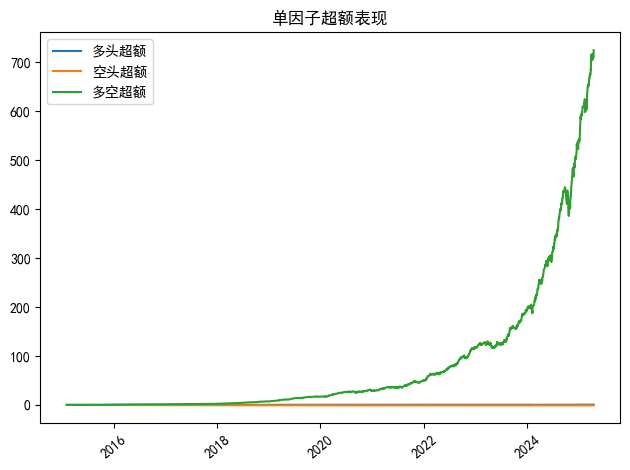

平均单边换手：0.83
年化交易成本:0.289 (未在超额中扣除)


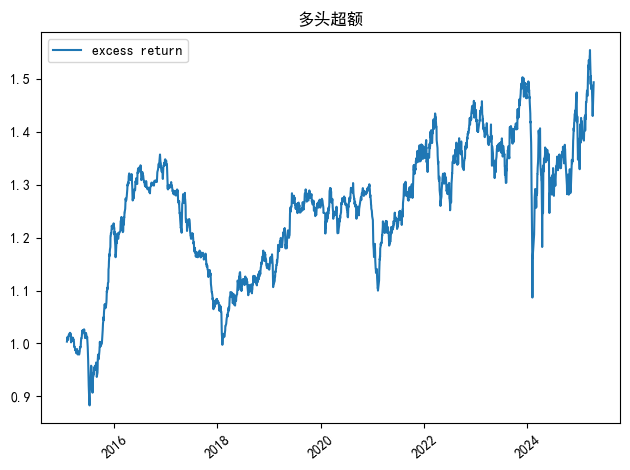

In [61]:
##只保留max_score最高20%
max_score2=max_score.apply(lambda x:x>x.quantile(0.8),axis=1)
#print(max_score2)
##在top 20%里按pret_score排序
factor_df=-1*(pret_score.mul(max_score2)).dropna(how='all').replace(0,np.nan)
# factor_df[factor_df.apply(lambda x:x>x.quantile(0.9),axis=1)]=np.nan
#print(factor_df)
res3=config.backtest_stand(factor_df.loc['2015':],top=300,fre='week',stock_pool='888888')